In [1]:
import openslide
import py_wsi
import py_wsi.imagepy_toolkit as tk
import matplotlib as plt
import os
import shutil
# from deephistopath.wsi import slide, util, tiles
# from deephistopath.wsi import filter as filter_

In [ ]:
test_path = '../data/inital_sample_4_items/gdc_download_20200519_034845.104976/309a5824-8f07-4c1e-b7ce-9c1a4ed50119/TCGA-HT-7857-01Z-00-DX1.DEC9B8F9-FE38-42C2-AE3A-629DBF0A7E4C.svs'


# Experimenting with OpenSlide

In [ ]:

test_image = openslide.open_slide(test_path)

test_image.get_thumbnail((500,500))

In [ ]:
test_image.level_count # number of levels of the WSI, associated with resolution

In [ ]:
test_image.level_dimensions

In [ ]:
test_image.level_downsamples

In [ ]:
test_patch = test_image.read_region((6000,5000),0,(256,256))
test_patch

In [ ]:
test_patch_2 = test_image.read_region((6256,5000),0,(256,256))
test_patch_2

In [ ]:
test_patch_3 = test_image.read_region((6000,5000),0,(512,256))
test_patch_3

In [ ]:
np.mean(test_patch.histogram())

In [ ]:
np.mean(test_patch_2.histogram())

In [ ]:
np.mean(test_patch_3.histogram())

In [ ]:
len(test_patch.histogram())

# py_wsi

## File Logsistics

In [ ]:
# All the svs files save to their own folder, 
# this is gonna make looping through them difficult, lets fix that

manifest_start_path = '../data/manifest_test/'
manifest_db_path = '../data/manifest_db/'

# looop through each item in main directory
for dir_ in os.listdir(manifest_start_path):
    
    # each svs file is contained within its own directory, so we go into each dir
    if os.path.isdir(manifest_start_path + dir_):
        
        # for each item in the specifified directory
        for file in os.listdir(manifest_start_path + dir_):
            
            # Look for svs files
            if file.endswith('.svs'):
                
                # move svs file to where we will access them
                svs_file_path = manifest_start_path + dir_ + '/' + file
                shutil.move(svs_file_path, manifest_db_path)


## Parameters

In [6]:
file_dir = "../data/manifest_db/"
db_location = "../data/patch_db/"
xml_dir = file_dir
patch_size = 256
level = 0
db_name = "patch_db"
overlap = 0



In [7]:
turtle = py_wsi.Turtle(file_dir, 
                       db_location, 
                       db_name, 
                       xml_dir=xml_dir, 
                       label_map= {},
                       storage_type='disk')

Storage type:               disk
Images directory:           ../data/manifest_db/
Data store directory:       ../data/patch_db/
Images found:               10


In [8]:
print("Total WSI images:    " + str(turtle.num_files))
print("LMDB name:           " + str(turtle.db_name))
print("File names:          " + str(turtle.files))
print("XML files found:     " + str(turtle.get_xml_files()))

Total WSI images:    10
LMDB name:           patch_db
File names:          ['TCGA-HT-7482-01Z-00-DX4.5B6C52B2-6DE5-46CC-B8C6-97F1E6DA0EF8.svs'
 'TCGA-VM-A8CF-01Z-00-DX4.AF3112EB-D194-48BD-B31F-5138814578A3.svs'
 'TCGA-R8-A6MK-01Z-00-DXB.F02C56E8-9793-4272-B14E-031A06EE2C8F.svs'
 'TCGA-HT-7882-01Z-00-DX4.8B139B5B-567F-4810-A03E-4818F3FFFACF.svs'
 'TCGA-VV-A829-01Z-00-DX2.4E2AB800-C97E-4293-886B-28793FFBAB47.svs'
 'TCGA-FG-A6J3-01Z-00-DX3.76B18CCB-CE54-4A5D-9B74-8E62AE893147.svs'
 'TCGA-DH-A66B-01Z-00-DX1.8669A577-0481-4C15-B4CB-0266E154DEFD.svs'
 'TCGA-VM-A8CB-01Z-00-DX9.8A7428DE-8450-4967-B777-AAD21A5AA36F.svs'
 'TCGA-DB-A64Q-01Z-00-DX1.CD3937C2-015A-490D-B6A6-BAEEFFDC0747.svs'
 'TCGA-HT-7857-01Z-00-DX1.DEC9B8F9-FE38-42C2-AE3A-629DBF0A7E4C.svs']
XML files found:     []


In [9]:
svs_name_test = 'TCGA-DB-A64Q-01Z-00-DX1.CD3937C2-015A-490D-B6A6-BAEEFFDC0747.svs'
svs_name_test_2 = 'TCGA-VM-A8CB-01Z-00-DX9.8A7428DE-8450-4967-B777-AAD21A5AA36F.svs'
svs_name_test_3 = 'TCGA-HT-7482-01Z-00-DX4.5B6C52B2-6DE5-46CC-B8C6-97F1E6DA0EF8.svs'
level_count, level_tiles, level_dims = turtle.retrieve_tile_dimensions(svs_name_test, patch_size=256)
print("Level count:         " + str(level_count))
print("Level tiles:         " + str(level_tiles))
print("Level dimensions:    " + str(level_dims))

Setting patch size 256 and tile size 256
Level count:         18
Level tiles:         ((1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (2, 2), (3, 3), (6, 5), (12, 10), (24, 20), (48, 40), (96, 80), (191, 160), (382, 320))
Level dimensions:    ((1, 1), (2, 2), (3, 3), (6, 5), (12, 10), (24, 20), (48, 40), (96, 80), (191, 160), (382, 320), (763, 639), (1526, 1277), (3051, 2553), (6101, 5105), (12201, 10209), (24402, 20418), (48804, 40836), (97607, 81671))


In [10]:
turtle.retrieve_tile_dimensions(svs_name_test, patch_size=256)[0]

Setting patch size 256 and tile size 256


18

In [11]:
for image_path in os.listdir('../data/manifest_db/'):
    if image_path.endswith('.svs'):
        level_count, level_tiles, level_dims = turtle.retrieve_tile_dimensions(image_path, patch_size=256)
        print("Image name:         " + image_path)
        print("Level count:         " + str(level_count))
#         print("Level tiles:         " + str(level_tiles))
#         print("Level dimensions:    " + str(level_dims))

Setting patch size 256 and tile size 256
Image name:         TCGA-HT-7482-01Z-00-DX4.5B6C52B2-6DE5-46CC-B8C6-97F1E6DA0EF8.svs
Level count:         17
Setting patch size 256 and tile size 256
Image name:         TCGA-VM-A8CF-01Z-00-DX4.AF3112EB-D194-48BD-B31F-5138814578A3.svs
Level count:         18
Setting patch size 256 and tile size 256
Image name:         TCGA-R8-A6MK-01Z-00-DXB.F02C56E8-9793-4272-B14E-031A06EE2C8F.svs
Level count:         18
Setting patch size 256 and tile size 256
Image name:         TCGA-HT-7882-01Z-00-DX4.8B139B5B-567F-4810-A03E-4818F3FFFACF.svs
Level count:         18
Setting patch size 256 and tile size 256
Image name:         TCGA-VV-A829-01Z-00-DX2.4E2AB800-C97E-4293-886B-28793FFBAB47.svs
Level count:         18
Setting patch size 256 and tile size 256
Image name:         TCGA-FG-A6J3-01Z-00-DX3.76B18CCB-CE54-4A5D-9B74-8E62AE893147.svs
Level count:         19
Setting patch size 256 and tile size 256
Image name:         TCGA-DH-A66B-01Z-00-DX1.8669A577-0481-4

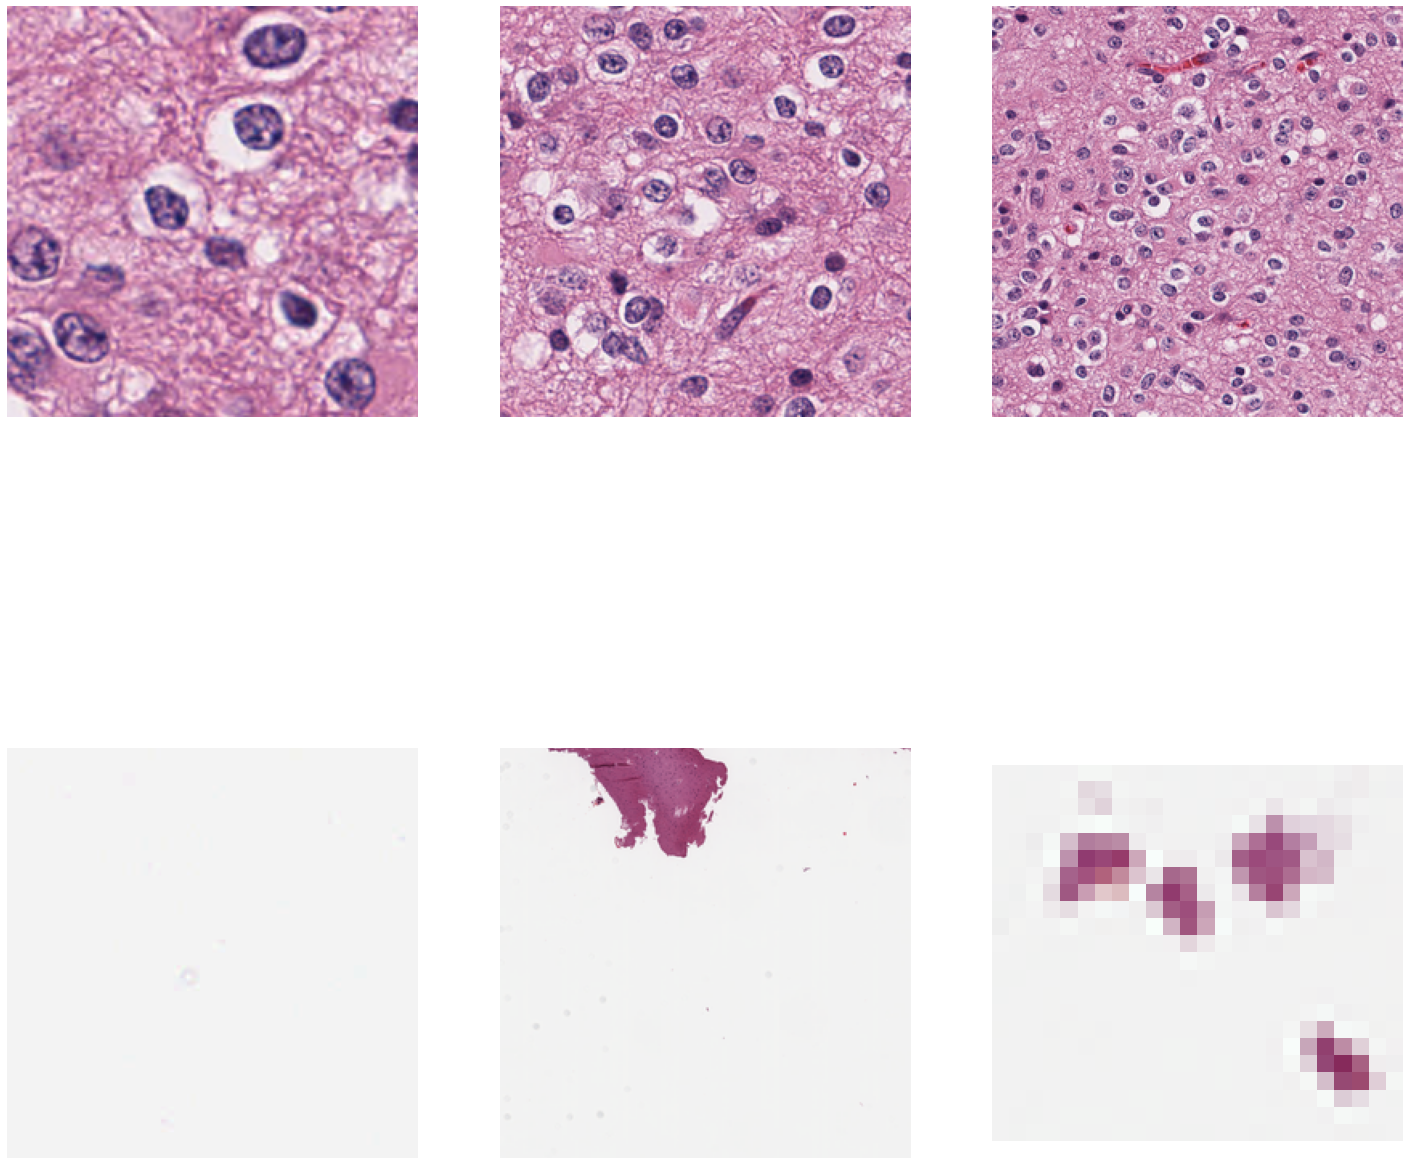

In [12]:
test_patch_1 = turtle.retrieve_sample_patch(svs_name_test, 256, 17, overlap = 0)
test_patch_2 = turtle.retrieve_sample_patch(svs_name_test, 256, 16, overlap = 0)
test_patch_3 = turtle.retrieve_sample_patch(svs_name_test, 256, 15, overlap = 0)
test_patch_4 = turtle.retrieve_sample_patch(svs_name_test_3, 256, 16, overlap = 0)
test_patch_5 = turtle.retrieve_sample_patch(svs_name_test_3, 256, 10, overlap = 0)
test_patch_6 = turtle.retrieve_sample_patch(svs_name_test_3, 256, 5, overlap = 0)
tk.show_images([test_patch_1, test_patch_2, test_patch_3, test_patch_4, test_patch_5, test_patch_6], 3, 2)

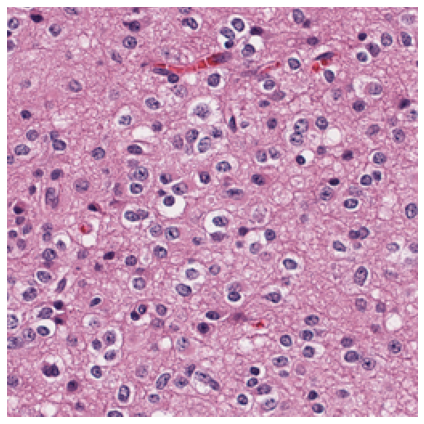

In [9]:
tk.show_images([test_patch_3], 3, 2)

In [13]:
turtle.sample_and_store_patches(512, 16, 0, load_xml=False, limit_bounds=True)

TCGA-HT-7482-01Z-00-DX4.5B6C52B2-6DE5-46CC-B8C6-97F1E6DA0EF8.svs TCGA-VM-A8CF-01Z-00-DX4.AF3112EB-D194-48BD-B31F-5138814578A3.svs TCGA-R8-A6MK-01Z-00-DXB.F02C56E8-9793-4272-B14E-031A06EE2C8F.svs TCGA-HT-7882-01Z-00-DX4.8B139B5B-567F-4810-A03E-4818F3FFFACF.svs TCGA-VV-A829-01Z-00-DX2.4E2AB800-C97E-4293-886B-28793FFBAB47.svs TCGA-FG-A6J3-01Z-00-DX3.76B18CCB-CE54-4A5D-9B74-8E62AE893147.svs TCGA-DH-A66B-01Z-00-DX1.8669A577-0481-4C15-B4CB-0266E154DEFD.svs TCGA-VM-A8CB-01Z-00-DX9.8A7428DE-8450-4967-B777-AAD21A5AA36F.svs TCGA-DB-A64Q-01Z-00-DX1.CD3937C2-015A-490D-B6A6-BAEEFFDC0747.svs TCGA-HT-7857-01Z-00-DX1.DEC9B8F9-FE38-42C2-AE3A-629DBF0A7E4C.svs 
============ Patches Dataset Stats ===========
Total patches sampled:                     62044
Patches saved to:                          ../data/patch_db/
Patches saved with prefix:                 patch_db

Time usage: 3:48:27


# deephistopath

In [17]:
BASE_DIR = os.path.join("..", "data") # MY PATHS

## BASE_DIR = os.path.join(os.sep, "Volumes", "BigData", "TUPAC")
# TRAIN_PREFIX = "TUPAC-TR-"
TRAIN_PREFIX = "TEST-TR-"

# SRC_TRAIN_DIR = os.path.join(BASE_DIR, "training_slides")
SRC_TRAIN_DIR = os.path.join(BASE_DIR, "manifest_db")
SRC_TRAIN_DIR

'../data/manifest_db'

In [ ]:
deep_test = slide.open_slide(test_path)

In [ ]:
deep_test.get_thumbnail((500,500))

In [ ]:
deep_test.slide_stats()

In [ ]:
filter_.apply_filters_to_image()

In [ ]:
filter_.multiprocess_apply_filters_to_images()